In [13]:
import numpy as np

import kcap_methods as km
import score_compression as sc
import deriv_stepsize_investigation as dsi

import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
step_sizes = np.array([])
for value in [0.00001, 0.0001, 0.001, 0.01]:
    for i in range(9):
        step_sizes = np.append(step_sizes, value * (i+1))
step_sizes = np.append(step_sizes, 0.1)

step_size_names = np.array([])
# for value in [0.00001, 0.0001, 0.001, 0.01]:
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.00001 * (i+1):.5f}")
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.0001 * (i+1):.4f}")
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.001 * (i+1):.3f}")
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.01 * (i+1):.2f}")
step_size_names = np.append(step_size_names, 0.1)

# Define the system of parameters

In [36]:
param_names = ['cosmological_parameters--omch2', 'cosmological_parameters--ombh2',
               'cosmological_parameters--sigma_8', 'cosmological_parameters--n_s',
               'intrinsic_alignment_parameters--a', 'halo_model_parameters--a']

default_stepsizes = [0.01, 0.01, 0.01, 0.01, 0.001, 0.01]
fiducial_values = np.array([0.120, 0.224, 0.8313891358929523, 0.974, 0.965, 3.13])

mocks_dir_3pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_3pt"
mocks_dir_5pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_5pt"
mocks_dir_7pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_7pt"
mocks_dir_9pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_9pt"
mocks_name = "kids_stepsize"

results_dir = "/home/ruyi/cosmology/kcap_methods/results/deriv_stepsizes"

# Calculate the derivatives for varying stepsizes and plot them

In [27]:
def fom_vals(param_index):
    this_param = param_names[param_index]

    fom_vals_3pt = dsi.get_1d_fom_vals(step_sizes = step_size_names, 
                                    data_params = ['theory'], 
                                    param_names = [param_names[param_index]], 
                                    mocks_dir = mocks_dir_3pt, 
                                    mocks_name = mocks_name)/fiducial_values[param_index]

    fom_vals_5pt = dsi.get_1d_fom_vals(step_sizes = step_size_names, 
                                    data_params = ['theory'], 
                                    param_names = [param_names[param_index]], 
                                    mocks_dir = mocks_dir_5pt, 
                                    mocks_name = mocks_name)/fiducial_values[param_index]

    fom_vals_7pt = dsi.get_1d_fom_vals(step_sizes = step_size_names, 
                                    data_params = ['theory'], 
                                    param_names = [param_names[param_index]], 
                                    mocks_dir = mocks_dir_7pt, 
                                    mocks_name = mocks_name)/fiducial_values[param_index]

    fom_vals_9pt = dsi.get_1d_fom_vals(step_sizes = step_size_names, 
                                    data_params = ['theory'], 
                                    param_names = [param_names[param_index]], 
                                    mocks_dir = mocks_dir_9pt, 
                                    mocks_name = mocks_name)/fiducial_values[param_index]

    return fom_vals_3pt, fom_vals_5pt, fom_vals_7pt, fom_vals_9pt

In [32]:
omch2_fom_vals_3pt, omch2_fom_vals_5pt, omch2_fom_vals_7pt, omch2_fom_vals_9pt = fom_vals(0)
ombh2_fom_vals_3pt, ombh2_fom_vals_5pt, ombh2_fom_vals_7pt, ombh2_fom_vals_9pt = fom_vals(1)
sigma8_fom_vals_3pt, sigma8_fom_vals_5pt, sigma8_fom_vals_7pt, sigma8_fom_vals_9pt = fom_vals(2)
ns_fom_vals_3pt, ns_fom_vals_5pt, ns_fom_vals_7pt, ns_fom_vals_9pt = fom_vals(3)
aia_fom_vals_3pt, aia_fom_vals_5pt, aia_fom_vals_7pt, aia_fom_vals_9pt = fom_vals(4)
haloa_fom_vals_3pt, haloa_fom_vals_5pt, haloa_fom_vals_7pt, haloa_fom_vals_9pt = fom_vals(5)

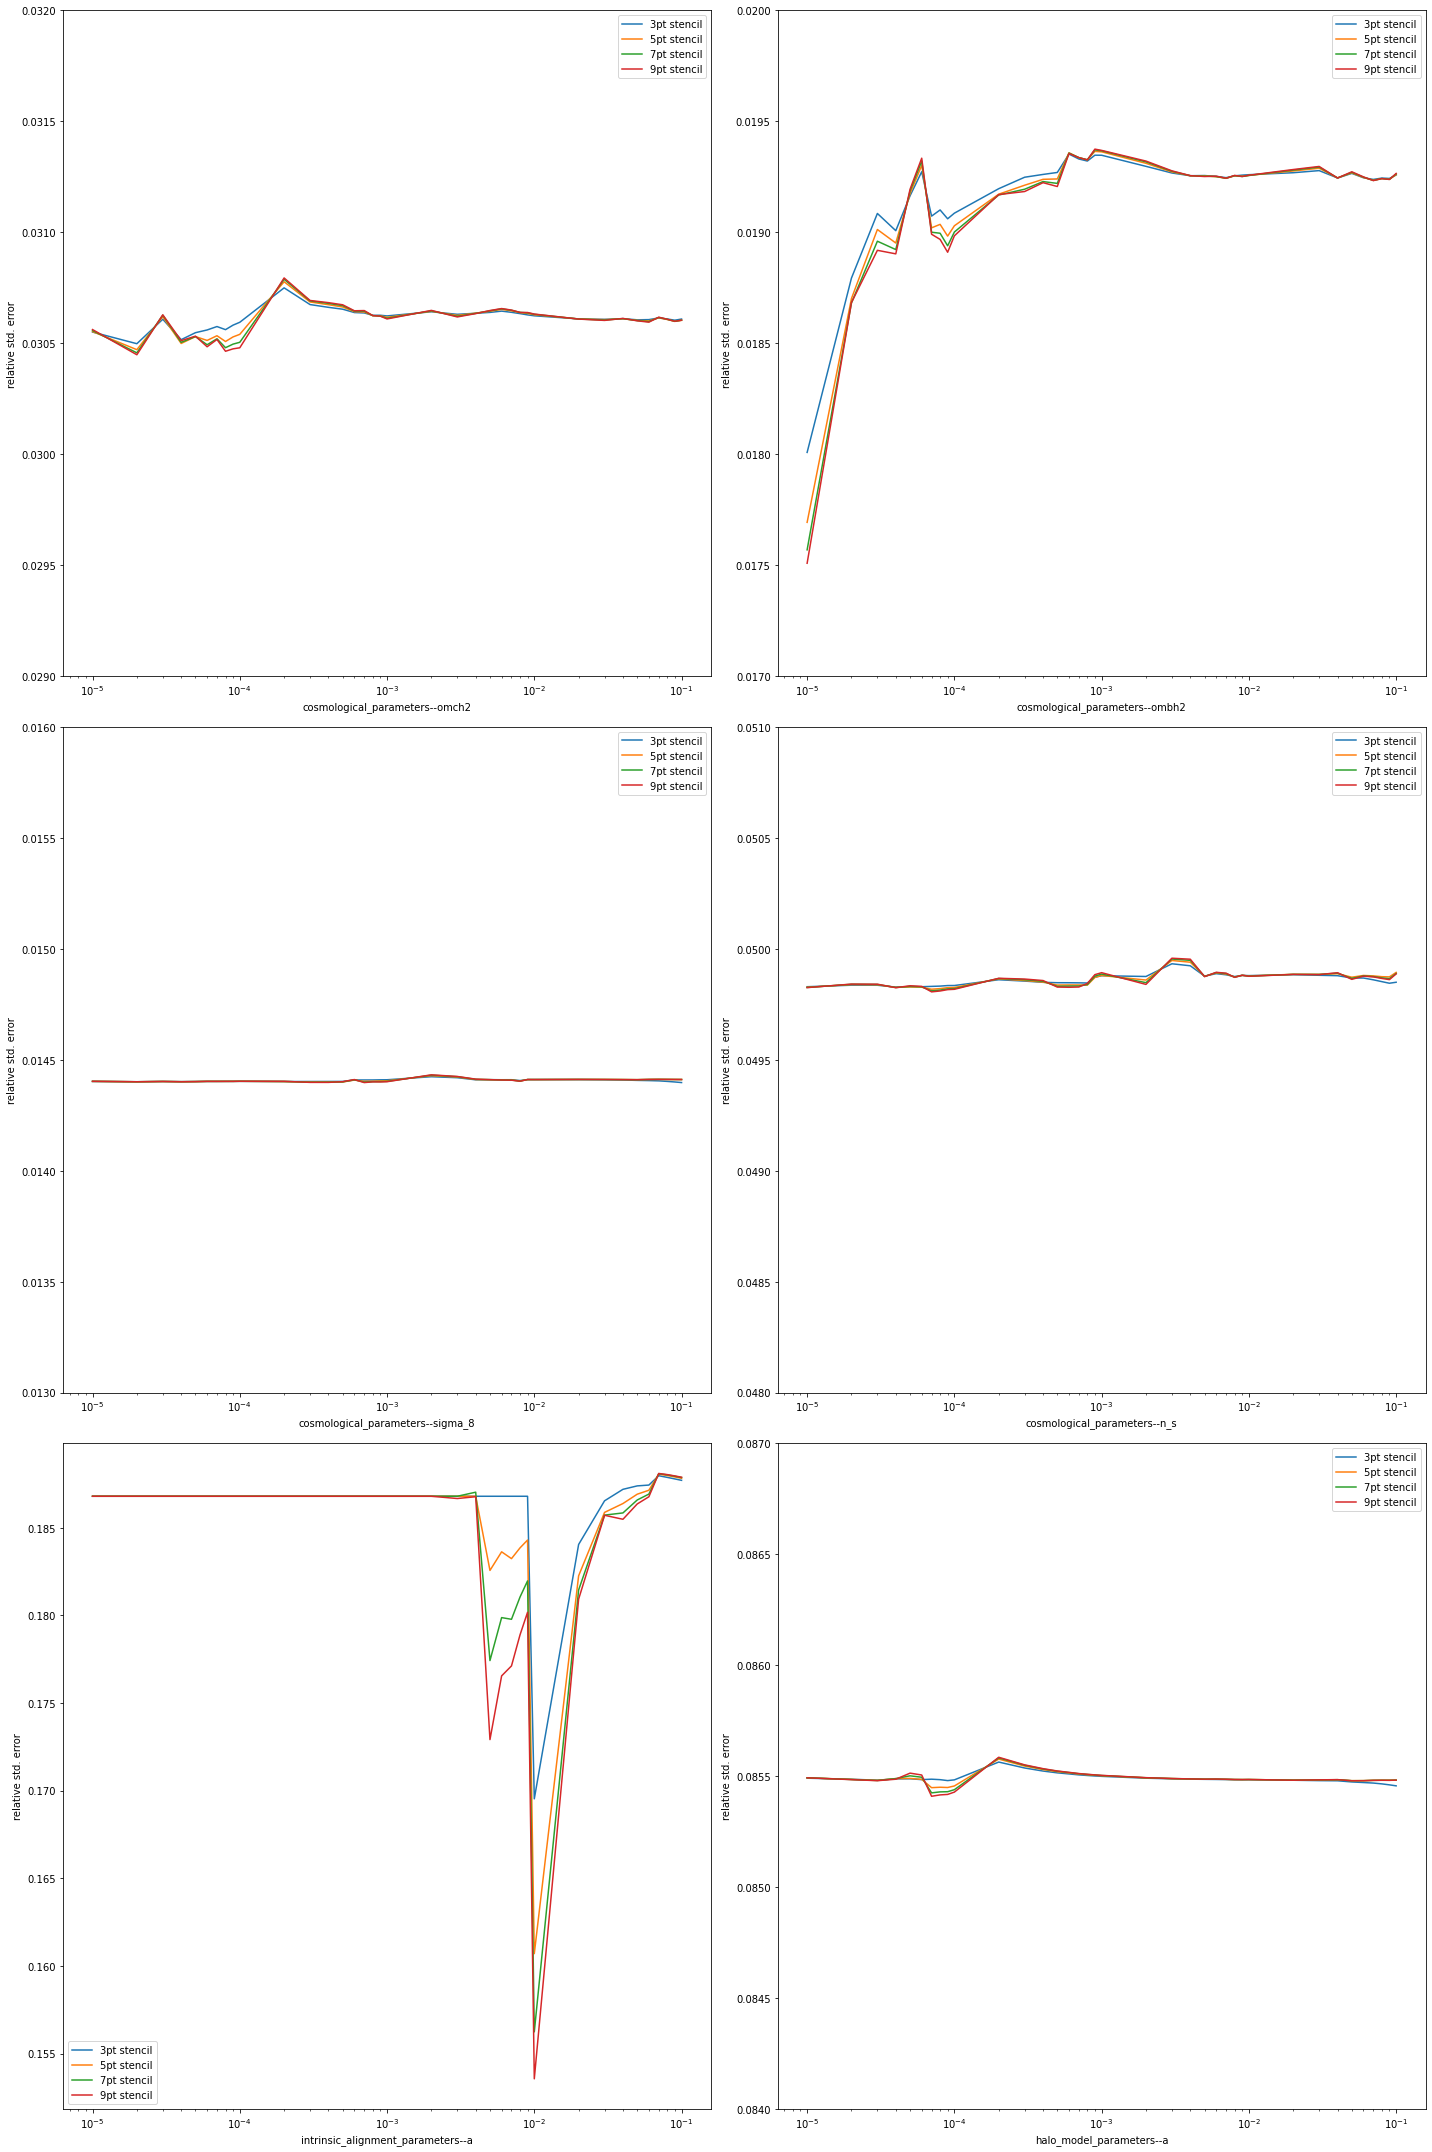

In [50]:
plt.figure(figsize=(20,30))
fig.suptitle("Derivatives wrt stepsize")

ax1 = plt.subplot(321)
ax1.plot(step_sizes, omch2_fom_vals_3pt, label = "3pt stencil")
ax1.plot(step_sizes, omch2_fom_vals_5pt, label = "5pt stencil")
ax1.plot(step_sizes, omch2_fom_vals_7pt, label = "7pt stencil")
ax1.plot(step_sizes, omch2_fom_vals_9pt, label = "9pt stencil")
ax1.legend()
ax1.set_xscale('log') 
ax1.set_ylim(0.029, 0.032) 
ax1.set_ylabel('relative std. error') 
ax1.set_xlabel(param_names[0]) 

ax2 = plt.subplot(322)
ax2.plot(step_sizes, ombh2_fom_vals_3pt, label = "3pt stencil")
ax2.plot(step_sizes, ombh2_fom_vals_5pt, label = "5pt stencil")
ax2.plot(step_sizes, ombh2_fom_vals_7pt, label = "7pt stencil")
ax2.plot(step_sizes, ombh2_fom_vals_9pt, label = "9pt stencil")
ax2.legend()
ax2.set_xscale('log') 
ax2.set_ylim(0.017, 0.02) 
ax2.set_ylabel('relative std. error') 
ax2.set_xlabel(param_names[1]) 

ax3 = plt.subplot(323)
ax3.plot(step_sizes, sigma8_fom_vals_3pt, label = "3pt stencil")
ax3.plot(step_sizes, sigma8_fom_vals_5pt, label = "5pt stencil")
ax3.plot(step_sizes, sigma8_fom_vals_7pt, label = "7pt stencil")
ax3.plot(step_sizes, sigma8_fom_vals_9pt, label = "9pt stencil")
ax3.legend()
ax3.set_xscale('log') 
ax3.set_ylim(0.013, 0.016) 
ax3.set_ylabel('relative std. error') 
ax3.set_xlabel(param_names[2]) 

ax4 = plt.subplot(324)
ax4.plot(step_sizes, ns_fom_vals_3pt, label = "3pt stencil")
ax4.plot(step_sizes, ns_fom_vals_5pt, label = "5pt stencil")
ax4.plot(step_sizes, ns_fom_vals_7pt, label = "7pt stencil")
ax4.plot(step_sizes, ns_fom_vals_9pt, label = "9pt stencil")
ax4.legend()
ax4.set_xscale('log') 
ax4.set_ylim(0.048, 0.051)
ax4.set_ylabel('relative std. error') 
ax4.set_xlabel(param_names[3]) 

ax5 = plt.subplot(325)
ax5.plot(step_sizes, aia_fom_vals_3pt, label = "3pt stencil")
ax5.plot(step_sizes, aia_fom_vals_5pt, label = "5pt stencil")
ax5.plot(step_sizes, aia_fom_vals_7pt, label = "7pt stencil")
ax5.plot(step_sizes, aia_fom_vals_9pt, label = "9pt stencil")
ax5.legend()
ax5.set_xscale('log') 
# ax5.set_ylim(0.18678, 0.1868) 
ax5.set_ylabel('relative std. error') 
ax5.set_xlabel(param_names[4]) 

ax6 = plt.subplot(326)
ax6.plot(step_sizes, haloa_fom_vals_3pt, label = "3pt stencil")
ax6.plot(step_sizes, haloa_fom_vals_5pt, label = "5pt stencil")
ax6.plot(step_sizes, haloa_fom_vals_7pt, label = "7pt stencil")
ax6.plot(step_sizes, haloa_fom_vals_9pt, label = "9pt stencil")
ax6.legend()
ax6.set_xscale('log') 
ax6.set_ylim(0.084, 0.087)
ax6.set_ylabel('relative std. error') 
ax6.set_xlabel(param_names[5]) 

plt.tight_layout()
plt.savefig("{}/deriv_std_error".format(results_dir))